In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

df = pd.read_csv("poker-matches-dataset.csv")
data = pd.read_csv('games.csv')
data_2 = pd.read_csv('games_2.csv')


X = data[['Score']]
y = data['Resultado']

X_2 = data_2[['Score', 'Apostadores', 'Desistentes']]
y_2 = data_2['Resultado']

X_3 = df.drop(columns=['Continuar'])  
y_3 = df['Continuar']      

X_4 = df.drop(columns=['Continuar', 'Aposta Necessaria', 'Jackpot'])

X_5 = df.drop(columns=['Continuar', 'Jogadores Restantes', 'Desistentes'])

X_6 = df.drop(columns=['Continuar', 'Perfil', 'Aposta Necessaria'])

y_4 = y_5 = y_6 = y_3

k = 5

#Score, Perfil, Jogadores Restantes ,Desistentes,

datasets = [
    (X, y),
    (X_2, y_2),
    (X_3, y_3),
    (X_4, y_4),
    (X_5, y_5),
    (X_6, y_6),
]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

results = []
feature_importances = []

for i, (X, y) in enumerate(datasets):
    print(f"\nTreinando no Dataset {i + 1}")
    scores = cross_val_score(rf_model, X, y, cv=k, scoring='accuracy')
    results.append(scores)

    rf_model.fit(X, y)
    feature_importances.append(rf_model.feature_importances_)

    print(f"Acurácias: {scores}")
    print(f"Média da Acurácia: {np.mean(scores):.4f}")




Treinando no Dataset 1
Acurácias: [0.5 0.6 0.7 0.5 0.9]
Média da Acurácia: 0.6400

Treinando no Dataset 2
Acurácias: [0.8 0.8 0.7 0.7 0.6]
Média da Acurácia: 0.7200

Treinando no Dataset 3
Acurácias: [0.64285714 0.88095238 0.95238095 0.92857143 0.90243902]
Média da Acurácia: 0.8614

Treinando no Dataset 4
Acurácias: [0.64285714 0.9047619  0.97619048 0.97619048 0.95121951]
Média da Acurácia: 0.8902

Treinando no Dataset 5
Acurácias: [0.57142857 0.71428571 0.85714286 0.9047619  0.87804878]
Média da Acurácia: 0.7851

Treinando no Dataset 6
Acurácias: [0.64285714 0.88095238 0.92857143 0.95238095 0.90243902]
Média da Acurácia: 0.8614


Estatística de Friedman: 17.67857142857142, valor p: 0.0033774294778155544
Rankings médios: [5.5 4.3 2.6 1.4 4.6 2.6]
Resultados do teste de Nemenyi:
          0         1         2         3         4         5
0  1.000000  0.913410  0.139040  0.007018  0.973980  0.139040
1  0.913410  1.000000  0.704482  0.139040  0.999858  0.704482
2  0.139040  0.704482  1.000000  0.913410  0.538193  1.000000
3  0.007018  0.139040  0.913410  1.000000  0.074302  0.913410
4  0.973980  0.999858  0.538193  0.074302  1.000000  0.538193
5  0.139040  0.704482  1.000000  0.913410  0.538193  1.000000


c:\Users\rapha\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


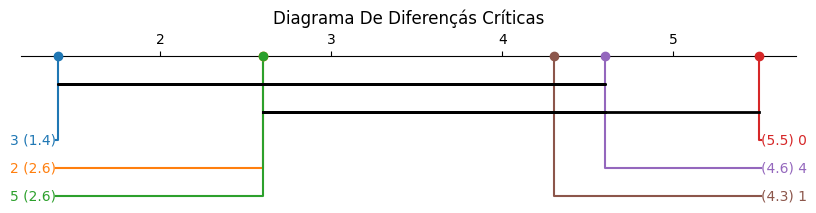

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, rankdata
import scikit_posthocs as sp

scores = np.array(results).T  

stat, p_value = friedmanchisquare(*scores.T)
print(f"Estatística de Friedman: {stat}, valor p: {p_value}")

ranks = np.apply_along_axis(rankdata, 1, -scores)  
mean_ranks = np.mean(ranks, axis=0)  
print(f"Rankings médios: {mean_ranks}")

result = sp.posthoc_nemenyi_friedman(scores)
print("Resultados do teste de Nemenyi:")
print(result)

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Diagrama De Diferençás Críticas')
sp.critical_difference_diagram(mean_ranks, result)
plt.show()


In [62]:
feature_importances

[array([1.]),
 array([0.38759446, 0.28892953, 0.32347601]),
 array([0.14374497, 0.088355  , 0.24146677, 0.27373217, 0.06947774,
        0.18322335]),
 array([0.41055567, 0.17701738, 0.10996487, 0.30246209]),
 array([0.18198789, 0.10918212, 0.3266238 , 0.38220619]),
 array([0.21265778, 0.50384749, 0.08323758, 0.20025715]),
 array([0.49427118, 0.17005553, 0.3356733 ])]

In [58]:
scores

array([[0.5       , 0.6       , 0.7       , 0.5       , 0.9       ],
       [0.8       , 0.8       , 0.7       , 0.7       , 0.6       ],
       [0.64285714, 0.88095238, 0.95238095, 0.92857143, 0.90243902],
       [0.64285714, 0.9047619 , 0.97619048, 0.97619048, 0.95121951],
       [0.57142857, 0.71428571, 0.85714286, 0.9047619 , 0.87804878],
       [0.64285714, 0.88095238, 0.92857143, 0.95238095, 0.90243902],
       [0.61904762, 0.83333333, 0.92857143, 0.95238095, 0.90243902]])

In [59]:

'''print("\nBase 1")
print(f'\nAcurácias por fold: {k_fold}')
print(f'Acurácia média: {k_fold.mean():.2f}')
print("\nBase 2")
print(f'\nAcurácias por fold: {k_fold_2}')
print(f'Acurácia média: {k_fold_2.mean():.2f}')
print("\nBase 3")
print(f'\nAcurácias por fold: {k_fold_3}')
print(f'Acurácia média: {k_fold_3.mean():.2f}')'''

'print("\nBase 1")\nprint(f\'\nAcurácias por fold: {k_fold}\')\nprint(f\'Acurácia média: {k_fold.mean():.2f}\')\nprint("\nBase 2")\nprint(f\'\nAcurácias por fold: {k_fold_2}\')\nprint(f\'Acurácia média: {k_fold_2.mean():.2f}\')\nprint("\nBase 3")\nprint(f\'\nAcurácias por fold: {k_fold_3}\')\nprint(f\'Acurácia média: {k_fold_3.mean():.2f}\')'

In [60]:
'''
print("\n========= Base 1 =========")
importances = decision_model_3.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.2f}')

print("\n========= Base 2 =========")
importances = decision_model_3.feature_importances_
for feature, importance in zip(X_2.columns, importances):
    print(f'{feature}: {importance:.2f}')

print("\n========= Base 3 =========")
importances = decision_model_3.feature_importances_
for feature, importance in zip(X_3.columns, importances):
    print(f'{feature}: {importance:.2f}')'''

'\nprint("\n========= Base 1 =========")\nimportances = decision_model_3.feature_importances_\nfor feature, importance in zip(X.columns, importances):\n    print(f\'{feature}: {importance:.2f}\')\n\nprint("\n========= Base 2 =========")\nimportances = decision_model_3.feature_importances_\nfor feature, importance in zip(X_2.columns, importances):\n    print(f\'{feature}: {importance:.2f}\')\n\nprint("\n========= Base 3 =========")\nimportances = decision_model_3.feature_importances_\nfor feature, importance in zip(X_3.columns, importances):\n    print(f\'{feature}: {importance:.2f}\')'

In [61]:
from joblib import dump

#dump(decision_model_3, "modelos/random_forest_model83%.joblib")
#print("Modelo salvo com sucesso!")